In [1]:
import pandas as pd
from scipy.stats import wilcoxon, mannwhitneyu, ttest_ind, ttest_rel, ttest_1samp
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import seaborn as sns

PROJECTION_PATH = "/hpc/home/mk423/Anxiety/FullDataWork/Projections/"

## Figure 1.B

In [2]:
EPM_df = pd.read_csv(PROJECTION_PATH + "EPM_SingleTask_kf_results.csv")
OFT_df = pd.read_csv(PROJECTION_PATH + "OFT_SingleTask_kf_results.csv")
FLX_df = pd.read_csv(PROJECTION_PATH + "FLX_SingleTask_kf_results.csv")

print("Train on EPM")
print("-------------------------------------------------------")
EPM_mean_aucs = []
OFT_mean_aucs = []
FLX_mean_aucs = []

for fold in range(4):
    EPM_mean_aucs.append(np.nanmean(EPM_df["epm-auc-fold-{}".format(fold)]))
    OFT_mean_aucs.append(np.nanmean(EPM_df["oft-auc-fold-{}".format(fold)]))
    FLX_mean_aucs.append(np.nanmean(EPM_df["flx-auc-fold-{}".format(fold)]))
    

print("\nPrediction (mean auc) +/- (stderr)")
print("EPM {:.3f} +/- {:.3f}, \nOFT {:.3f} +/- {:.3f}, \nFLX {:.3f} +/- {:.3f}".format(np.mean(EPM_mean_aucs),np.std(EPM_mean_aucs)/2,
                                                           np.mean(OFT_mean_aucs),np.std(OFT_mean_aucs)/2,
                                                           np.mean(FLX_mean_aucs),np.std(FLX_mean_aucs)/2))

print("\nStatistics (t stat, pvalue)")
print("EPM {:.3f}, {:.3f} \nOFT {:.3f}, {:.3f} \nFLX {:.3f}, {:.3f}".format(ttest_1samp(EPM_mean_aucs,0.5,alternative="greater").statistic,ttest_1samp(EPM_mean_aucs,0.5,alternative="greater").pvalue,
                                                                            ttest_1samp(OFT_mean_aucs,0.5,alternative="greater").statistic,ttest_1samp(OFT_mean_aucs,0.5,alternative="greater").pvalue,
                                                                            ttest_1samp(FLX_mean_aucs,0.5,alternative="greater").statistic,ttest_1samp(FLX_mean_aucs,0.5,alternative="greater").pvalue,))

print("\n\nTrain on OFT/BOF")
print("-------------------------------------------------------")

EPM_mean_aucs = []
OFT_mean_aucs = []
FLX_mean_aucs = []

for fold in range(4):
    EPM_mean_aucs.append(np.nanmean(OFT_df["epm-auc-fold-{}".format(fold)]))
    OFT_mean_aucs.append(np.nanmean(OFT_df["oft-auc-fold-{}".format(fold)]))
    FLX_mean_aucs.append(np.nanmean(OFT_df["flx-auc-fold-{}".format(fold)]))
    

print("\nPrediction (mean auc) +/- (stderr)")
print("EPM {:.3f} +/- {:.3f}, \nOFT {:.3f} +/- {:.3f}, \nFLX {:.3f} +/- {:.3f}".format(np.mean(EPM_mean_aucs),np.std(EPM_mean_aucs)/2,
                                                           np.mean(OFT_mean_aucs),np.std(OFT_mean_aucs)/2,
                                                           np.mean(FLX_mean_aucs),np.std(FLX_mean_aucs)/2))

print("\nStatistics (t stat, pvalue)")
print("EPM {:.3f}, {:.3f} \nOFT {:.3f}, {:.3f} \nFLX {:.3f}, {:.3f}".format(ttest_1samp(EPM_mean_aucs,0.5,alternative="greater").statistic,ttest_1samp(EPM_mean_aucs,0.5,alternative="greater").pvalue,
                                                                            ttest_1samp(OFT_mean_aucs,0.5,alternative="greater").statistic,ttest_1samp(OFT_mean_aucs,0.5,alternative="greater").pvalue,
                                                                            ttest_1samp(FLX_mean_aucs,0.5,alternative="greater").statistic,ttest_1samp(FLX_mean_aucs,0.5,alternative="greater").pvalue,))

print("\n\nTrain on FLX")
print("-------------------------------------------------------")

EPM_mean_aucs = []
OFT_mean_aucs = []
FLX_mean_aucs = []

for fold in range(4):
    EPM_mean_aucs.append(np.nanmean(FLX_df["epm-auc-fold-{}".format(fold)]))
    OFT_mean_aucs.append(np.nanmean(FLX_df["oft-auc-fold-{}".format(fold)]))
    FLX_mean_aucs.append(np.nanmean(FLX_df["flx-auc-fold-{}".format(fold)]))
    

print("\nPrediction (mean auc) +/- (stderr)")
print("EPM {:.3f} +/- {:.3f}, \nOFT {:.3f} +/- {:.3f}, \nFLX {:.3f} +/- {:.3f}".format(np.mean(EPM_mean_aucs),np.std(EPM_mean_aucs)/2,
                                                           np.mean(OFT_mean_aucs),np.std(OFT_mean_aucs)/2,
                                                           np.mean(FLX_mean_aucs),np.std(FLX_mean_aucs)/2))

print("\nFLX Statistics (t stat, pvalue)")
print("EPM {:.3f}, {:.3f} \nOFT {:.3f}, {:.3f} \nFLX {:.3f}, {:.3f}".format(ttest_1samp(EPM_mean_aucs,0.5,alternative="greater").statistic,ttest_1samp(EPM_mean_aucs,0.5,alternative="greater").pvalue,
                                                                            ttest_1samp(OFT_mean_aucs,0.5,alternative="greater").statistic,ttest_1samp(OFT_mean_aucs,0.5,alternative="greater").pvalue,
                                                                            ttest_1samp(FLX_mean_aucs,0.5,alternative="greater").statistic,ttest_1samp(FLX_mean_aucs,0.5,alternative="greater").pvalue,))

Train on EPM
-------------------------------------------------------

Prediction (mean auc) +/- (stderr)
EPM 0.743 +/- 0.007, 
OFT 0.776 +/- 0.004, 
FLX 0.496 +/- 0.005

Statistics (t stat, pvalue)
EPM 29.088, 0.000 
OFT 62.645, 0.000 
FLX -0.701, 0.733


Train on OFT/BOF
-------------------------------------------------------

Prediction (mean auc) +/- (stderr)
EPM 0.662 +/- 0.003, 
OFT 0.755 +/- 0.007, 
FLX 0.513 +/- 0.011

Statistics (t stat, pvalue)
EPM 48.038, 0.000 
OFT 30.008, 0.000 
FLX 1.005, 0.195


Train on FLX
-------------------------------------------------------

Prediction (mean auc) +/- (stderr)
EPM 0.489 +/- 0.006, 
OFT 0.437 +/- 0.013, 
FLX 0.680 +/- 0.010

FLX Statistics (t stat, pvalue)
EPM -1.516, 0.887 
OFT -4.196, 0.988 
FLX 15.678, 0.000


## Figure 1.E

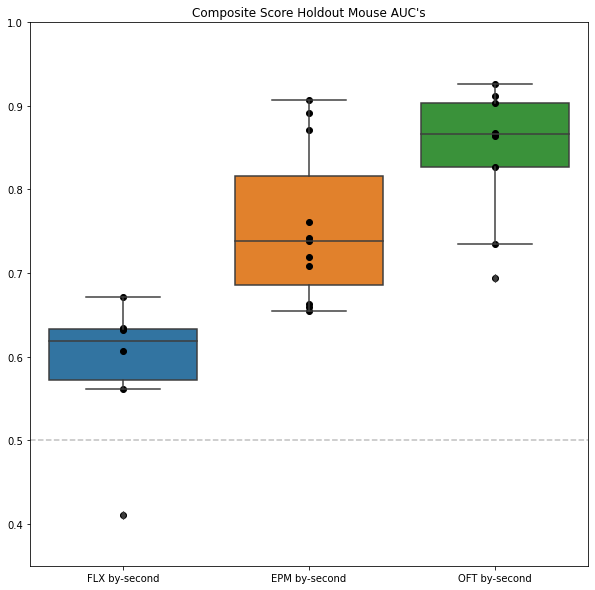

In [3]:
final_model_epm_results = pd.read_csv(PROJECTION_PATH + "EPM_Holdout_Projections.csv")
final_model_bof_results = pd.read_csv(PROJECTION_PATH + "OFT_Holdout_Projections.csv")
final_model_flx_results = pd.read_csv(PROJECTION_PATH + "FLX_Holdout_Projections.csv")

epm_aucs = np.unique(final_model_epm_results["auc (Homecage vs. Task)"])
bof_aucs = np.unique(final_model_bof_results["auc (Homecage vs. Task)"])
flx_aucs = np.unique(final_model_flx_results["auc (last-30-minutes)"])

all_aucs = np.hstack([flx_aucs,epm_aucs,bof_aucs,bof_aucs])
all_exps = np.hstack([["epm" for _ in epm_aucs],
                      ["bof" for _ in bof_aucs],
                      ["flx" for _ in flx_aucs]])

plt.figure(figsize=(10,10))
sns.boxplot(data=[flx_aucs,epm_aucs,bof_aucs]
           )

plt.scatter(np.zeros(len(flx_aucs)),
            flx_aucs,
           color="black")

plt.scatter(np.ones(len(epm_aucs)),
            epm_aucs,
           color="black")

plt.scatter(2*np.ones(len(bof_aucs)),
            bof_aucs,
           color="black")

plt.axhline(0.5,linestyle="dashed",color="gray",alpha=0.5)
plt.xticks([0,1,2],["FLX by-second","EPM by-second","OFT by-second"])
plt.title("Composite Score Holdout Mouse AUC's")
plt.ylim([.35,1])
plt.show()

In [15]:
print("BOF & FLX",np.intersect1d(np.unique(final_model_bof_results.mouse),np.unique(final_model_flx_results.mouse)).shape)
print("BOF & EPM",np.intersect1d(np.unique(final_model_bof_results.mouse),np.unique(final_model_epm_results.mouse)).shape)
print("EPM & FLX",np.intersect1d(np.unique(final_model_epm_results.mouse),np.unique(final_model_flx_results.mouse)).shape)
#print("BOF & FLX",np.intersect1d(np.unique(final_model_bof_results.mouse),np.unique(final_model_flx_results.mouse)))
print(np.intersect1d(np.union1d(final_model_flx_results.mouse,final_model_epm_results.mouse),
                 np.unique(final_model_flx_results.mouse)).shape)

BOF & FLX (1,)
BOF & EPM (8,)
EPM & FLX (1,)
(6,)


## Figure 1.F

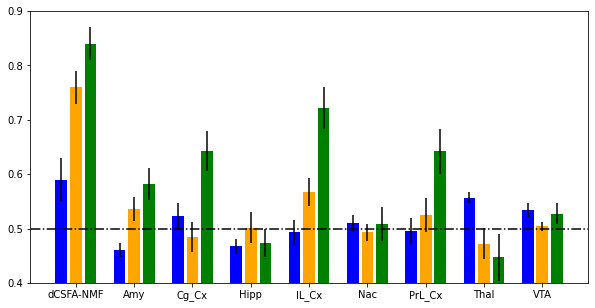

In [4]:
df_powFeature_models = pd.read_csv(PROJECTION_PATH + "singleFeature_dcsfa_results.csv")
offset = 0.25
width = offset - 0.2*offset

plt.figure(figsize=(10,5))
for model in range(9):
    
    plt.bar(model - offset, df_powFeature_models.flx_mean_list.values[model],color="blue",
            width=width)
    plt.errorbar(model - offset, df_powFeature_models.flx_mean_list.values[model],
                 yerr=df_powFeature_models.flx_sterr_list.values[model],color="black")
    
    plt.bar(model, df_powFeature_models.epm_mean_list.values[model],color="orange",
            width=width)
    plt.errorbar(model, df_powFeature_models.epm_mean_list.values[model],
                 yerr=df_powFeature_models.epm_sterr_list.values[model],color="black")
    
    plt.bar(model + offset, df_powFeature_models.oft_mean_list.values[model],color="green",
            width=width)
    plt.errorbar(model + offset, df_powFeature_models.oft_mean_list.values[model],
                 yerr=df_powFeature_models.oft_sterr_list.values[model],color="black")
    
plt.ylim([0.4,0.9])
plt.axhline(0.5,-1,10,linestyle="dashdot",color="black")
plt.xticks(range(9),df_powFeature_models.region.values)
plt.show()

In [5]:
#Statistical analyses are present for the single region models in this dataframe
df_powFeature_models.head()

,Unnamed: 0,flx_mean_list,flx_sterr_list,flx_pval_list,flx_t_list,epm_mean_list,epm_sterr_list,epm_pval_list,epm_t_list,oft_mean_list,oft_sterr_list,oft_pval_list,oft_t_list,region
0,0,0.590000,0.040000,NaN,NaN,0.760000,0.030000,NaN,NaN,0.840000,0.030000,NaN,NaN,dCSFA-NMF
1,1,0.460846,0.013399,0.977760,-2.667534,0.536529,0.022213,0.073980,1.567967,0.581905,0.029075,0.014495,2.655904,Amy
2,2,0.522455,0.024023,0.216229,0.853306,0.484157,0.027860,0.700229,-0.542219,0.642352,0.037043,0.003376,3.623087,Cg_Cx
3,3,0.467045,0.014416,0.954367,-2.086838,0.501691,0.028514,0.478008,0.056552,0.473061,0.026149,0.820082,-0.971322,Hipp
4,4,0.492944,0.022995,0.604697,-0.280119,0.567937,0.025679,0.015128,2.522536,0.722412,0.038406,0.000301,5.459930,IL_Cx
